# importing all neccecary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selection of Dataset

In [2]:
df = pd.read_csv('Salary_Data1.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(151, 2)

# Perform EDA (Exploratory Data Analysis)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             3
dtype: int64

In [5]:
df = df[df["Salary"].notnull()]
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  148 non-null    float64
 1   Salary           148 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [7]:
df=df.dropna()
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,148.0,8.313514,4.060908,1.1,4.9,8.7,10.9,18.0
Salary,148.0,98923.486486,30974.238631,37731.0,66029.0,109431.0,123549.0,145300.0


# Visualization of data based on parameter

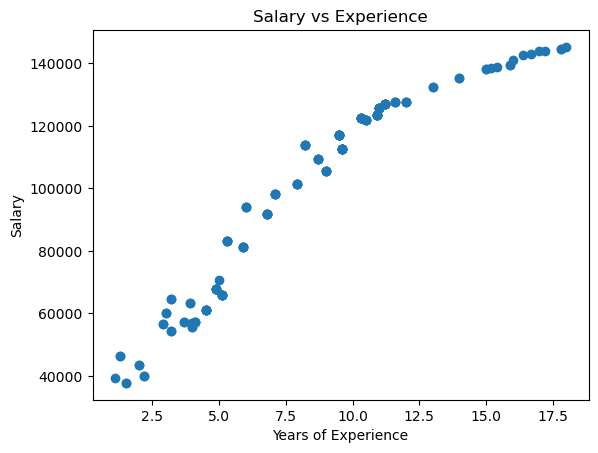

In [29]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

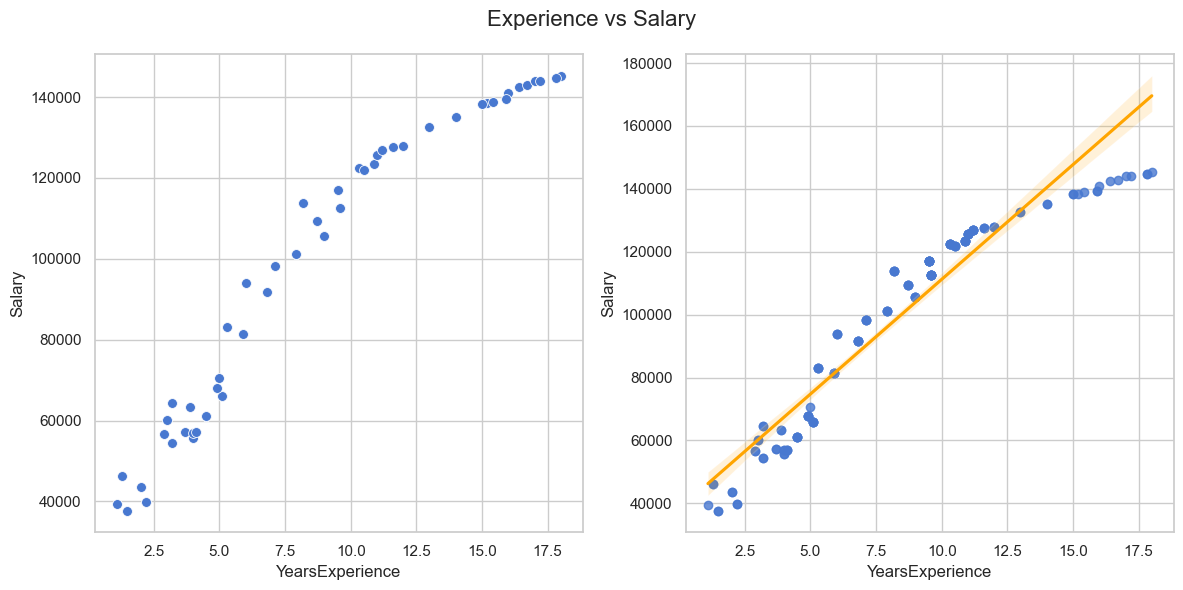

In [30]:
sns.set(style='whitegrid', palette='muted')

fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='b', s=50, ax=axes[0])
sns.regplot(x='YearsExperience', y='Salary', data=df, color='b', line_kws={'color': 'orange'}, ax=axes[1])

fig.suptitle('Experience vs Salary', fontsize=16)
plt.tight_layout()
plt.show()

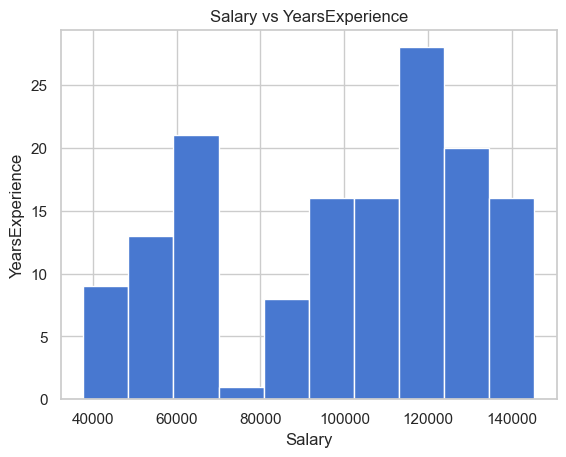

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = df['Salary']
y = df['YearsExperience']
plt.title('Salary vs YearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.hist(x)
plt.show()

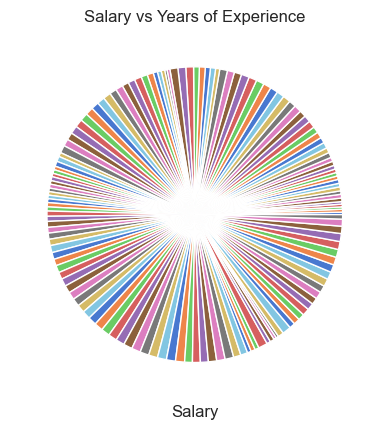

In [33]:
import matplotlib.pyplot as plt
import numpy as np

y = df['Salary']
plt.title('Salary vs Years of Experience')
plt.xlabel('Salary')
plt.pie(y)
plt.show()

# Selection of Feature

In [13]:
df = df[["YearsExperience", "Salary"]]
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Prepare Data

In [14]:
X = df.drop('Salary', axis=1)
y=df['Salary']

In [15]:
X.shape, y.shape

((148, 1), (148,))

# Split data into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((118, 1), (118,), (30, 1), (30,))

# Define model

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Test the LinearRegression Model

In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 75401.76462675, 103853.79580853, 103853.79580853,  95828.86393675,
       119903.6595521 ,  61540.5186664 ,  67376.83275497,  87803.93206496,
        75401.76462675,  47679.27270604, 101665.17802532, 108231.03137496,
       118444.58102996,  71024.52906032, 108231.03137496, 113337.80620246,
       113337.80620246, 162216.93669424, 140330.7588621 , 122821.81659639,
       147626.15147282,  81967.61797639, 118444.58102996,  87803.93206496,
       117715.04176889, 103853.79580853, 147626.15147282, 125739.97364067,
        54245.12605568,  76860.84314889])

In [19]:
y_test

16      66029.0
56     105582.0
93     105582.0
90     101302.0
32     126990.0
76      64445.0
80      56957.0
88      91738.0
70      66029.0
1       46205.0
92     109431.0
68     112635.0
31     125704.0
126     61111.0
95     112635.0
140    122391.0
96     122391.0
110    143964.0
102    135200.0
33     127561.0
119    138254.0
42      93940.0
115    125704.0
43      91738.0
44     123549.0
25     105582.0
103    138254.0
66     127813.0
129     39891.0
71      83088.0
Name: Salary, dtype: float64

# Checking the difference b/w Actual Data, Prediction Data and their Difference

In [20]:
diff = y_test - y_pred

In [21]:
pd.DataFrame(np.c_[y_test, y_pred, diff], columns=['Actual', 'Predicted', 'Difference'])

,Actual,Predicted,Difference
0,66029.0,75401.764627,-9372.764627
1,105582.0,103853.795809,1728.204191
2,105582.0,103853.795809,1728.204191
3,101302.0,95828.863937,5473.136063
4,126990.0,119903.659552,7086.340448
5,64445.0,61540.518666,2904.481334
6,56957.0,67376.832755,-10419.832755
7,91738.0,87803.932065,3934.067935
8,66029.0,75401.764627,-9372.764627
9,46205.0,47679.272706,-1474.272706


# Visualize the training data & Plot all training point of training data

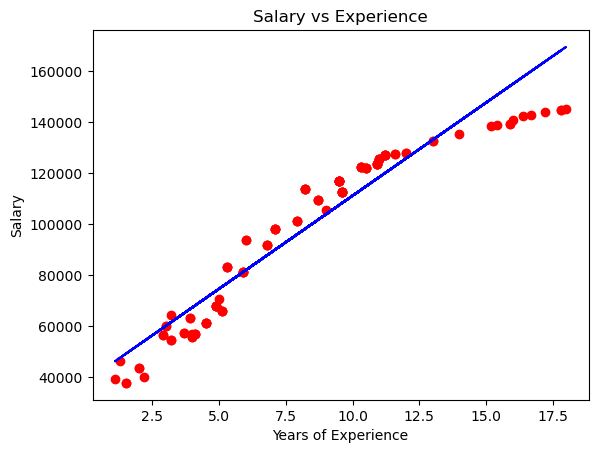

In [22]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualize the testing data

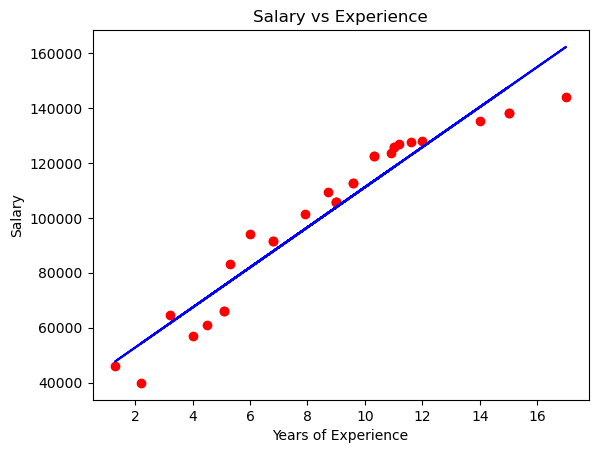

In [23]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, model.predict(X_test), color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Check Accuracy

In [24]:
# print("Prediction accuracy: {:.2f}".format(r2_score(y_test, y_preds)))
# print("Mean Squared Error: = {:.2f}".format(mean_squared_error(y_test, y_preds)))
accuracy = model.score(X_test, y_test)
print(f"Accuracy of model: {accuracy}")

Accuracy of model: 0.9267589808358415


# Checking Mean Squared Error and R2_Score

In [25]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [26]:
error = mse, r2

In [27]:
error

(7886.227588609006, 0.9267589808358415)

# Enter the deatils to predict the Salary

In [28]:
enter_name = str(input())
enter_experience = int(input())
model.predict([[enter_experience]])[0]
print(f"{enter_name} your salary of {enter_experience} year experience employee = Rs.{int(model.predict([[enter_experience]])[0])} thousands/month.")

Rajneesh
14
Rajneesh your salary of 14 year experience employee = Rs.140330 thousands/month.


E:\Software\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Software\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
